# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [1]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [3]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [4]:
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
19488,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0

In [5]:
final_fies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19492 entries, 0 to 19491
Data columns (total 91 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   W_REGN                        19492 non-null  int64  
 1   W_PROV                        19492 non-null  int64  
 2   SEQ_NO                        19492 non-null  int64  
 3   RPROV                         19492 non-null  int64  
 4   FSIZE                         19492 non-null  float64
 5   REG_SAL                       19492 non-null  int64  
 6   SEASON_SAL                    19492 non-null  int64  
 7   WAGES                         19492 non-null  int64  
 8   NETSHARE                      19492 non-null  int64  
 9   CASH_ABROAD                   19492 non-null  int64  
 10  CASH_DOMESTIC                 19492 non-null  int64  
 11  RENTALS_REC                   19492 non-null  int64  
 12  INTEREST                      19492 non-null  int64  
 13  P

### **6️⃣ Application of Proximity (Distance Analysis)**

#### Correlation Analysis

In [47]:
def plot_correlation_heatmap(dataframe, aggregated_column, components, title):
    # Subset the dataframe
    subset = dataframe[[aggregated_column] + components]
    
    # Calculate the correlation matrix
    correlation_matrix = subset.corr()
    
    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

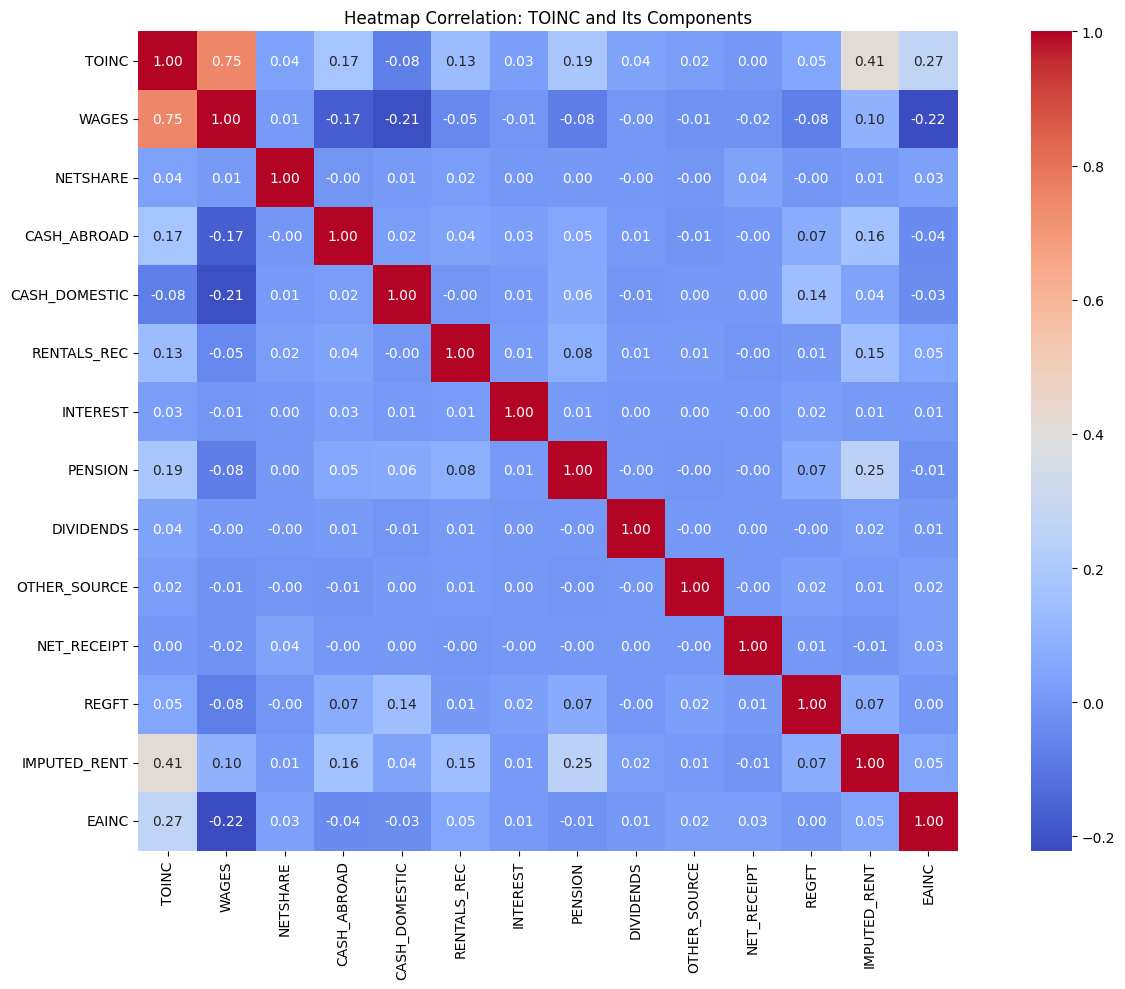

In [48]:
# Define the aggregated column and its components
aggregated_col = 'TOINC'
components_list = ['WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'IMPUTED_RENT', 'EAINC']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- The `WAGES` component shows the highest correlation with `TOINC` at 0.75, emphasizing the strong dependence of households in **NCR** on **employment income**, which aligns with the *region’s highly urbanized and service-driven economy*.
- `IMPUTED_RENT` follows with a correlation of 0.41, reflecting the significant role of homeownership among households in NCR. This value represents the monetary benefit households gain by living in their own property instead of paying rent, particularly relevant in NCR’s high property value context.
- `EAINC` (entrepreneurial activities income) records a correlation of 0.27, indicating that while some households engage in negosyo, income from self-employment or business ventures constitutes a *relatively smaller share* of total household income in NCR. 

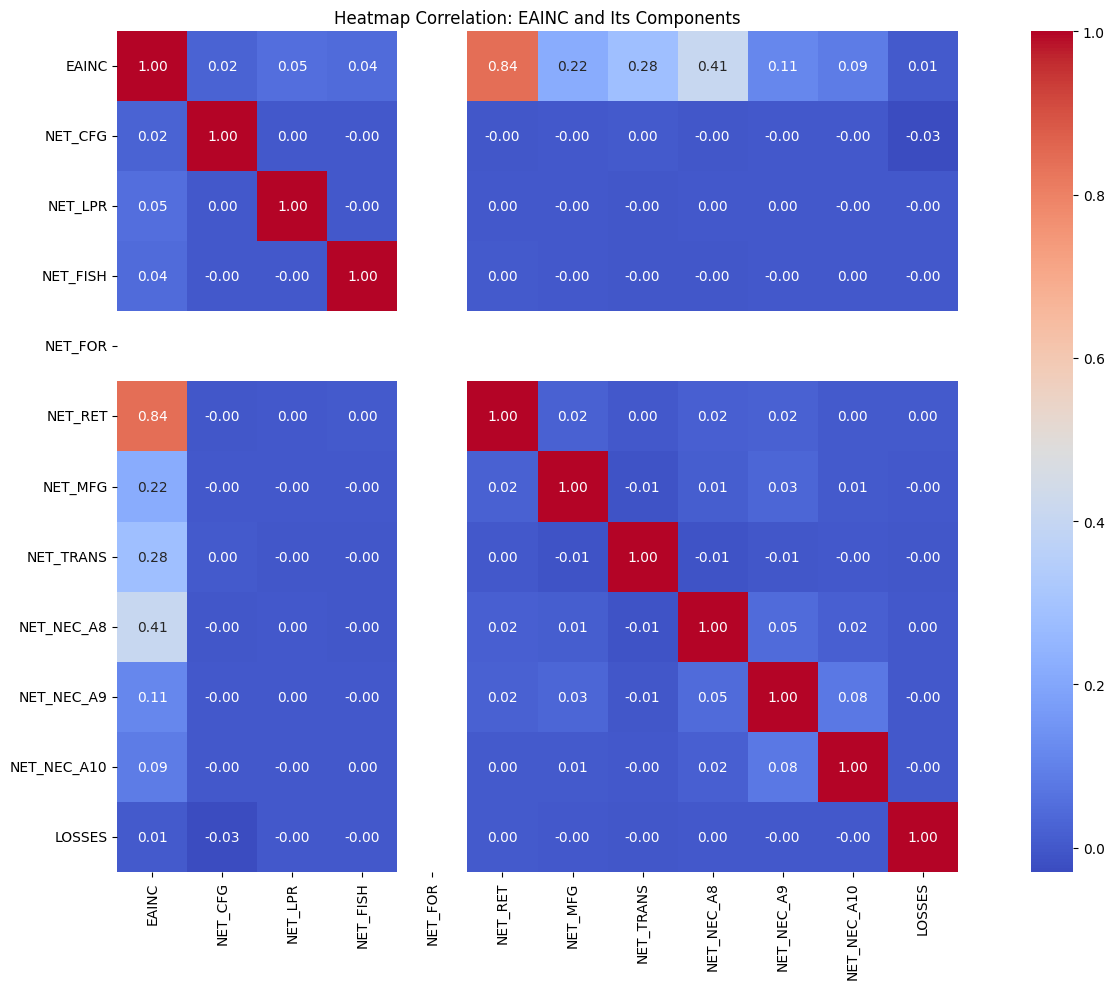

In [40]:
# Define the aggregated column and its components
aggregated_col = 'EAINC'
components_list = ['NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'LOSSES']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- `NET_RET` shows the highest correlation with EAINC at 0.84, indicating that retail and wholesale activities are the primary drivers of entrepreneurial income among Filipino households.
- No correlation was computed for `NET_FOR` due to all values being zero, which is expected given NCR’s highly urbanized setting and lacking of forestry-related activities.

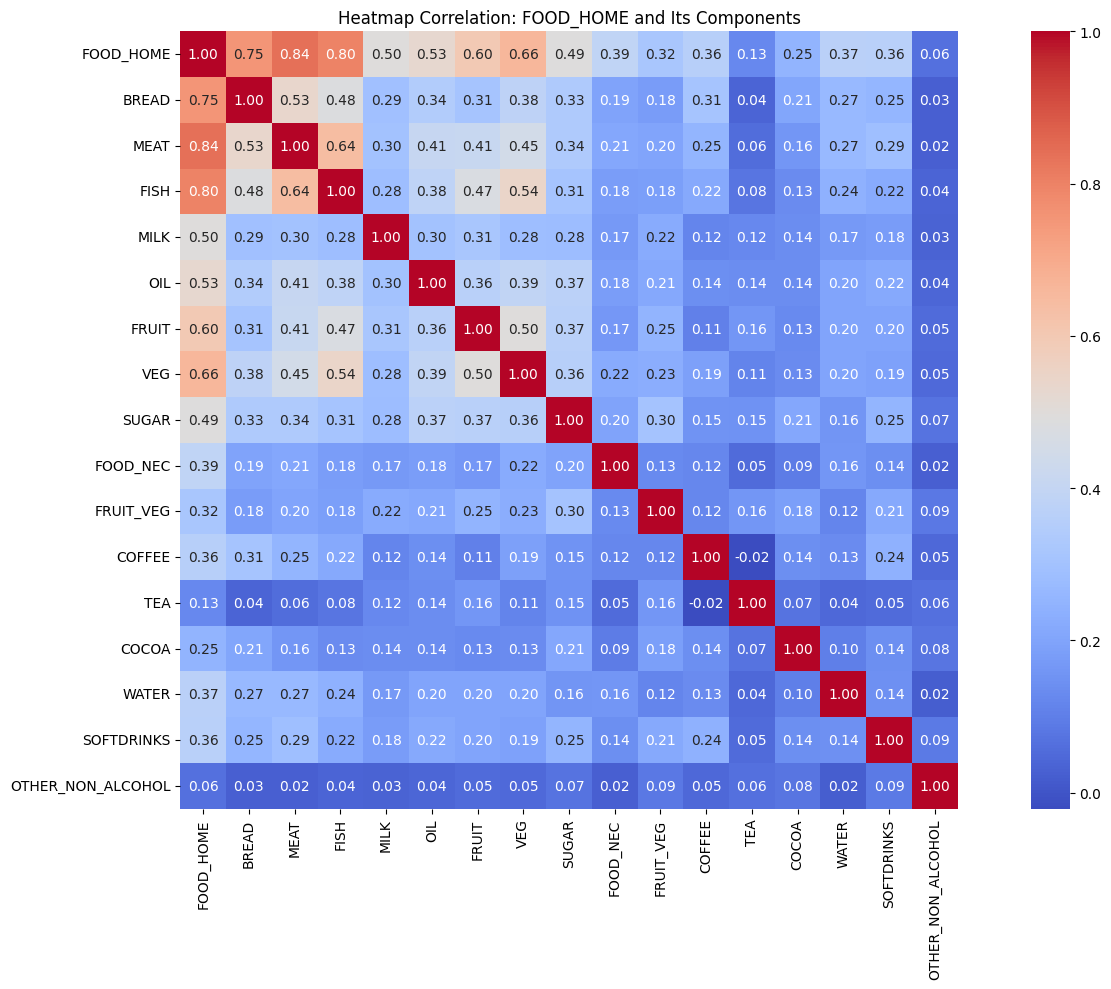

In [41]:
# Define the aggregated column and its components
aggregated_col = 'FOOD_HOME'
components_list = ['BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- Based on the heatmap correlation of `FOOD_HOME` and its components, the top three contributors to household food expenses are `MEAT` (0.84), `FISH` (0.80), and `BREAD` (0.75), highlighting the significant share of protein sources and staple foods in NCR households' consumption.
- Other notable contributors include `VEG` (0.66), `FRUIT` (0.60), `OIL` (0.53), `MILK` (0.50), and `SUGAR` (0.49), reflecting spending patterns focused on basic and versatile food items essential for daily meals.
- These correlations suggest that households in NCR prioritize essential and nutrient-rich food items over non-essential products such as `COFFEE`, `TEA`, or `COCOA`, which show lower correlations with total food-at-home expenditure.

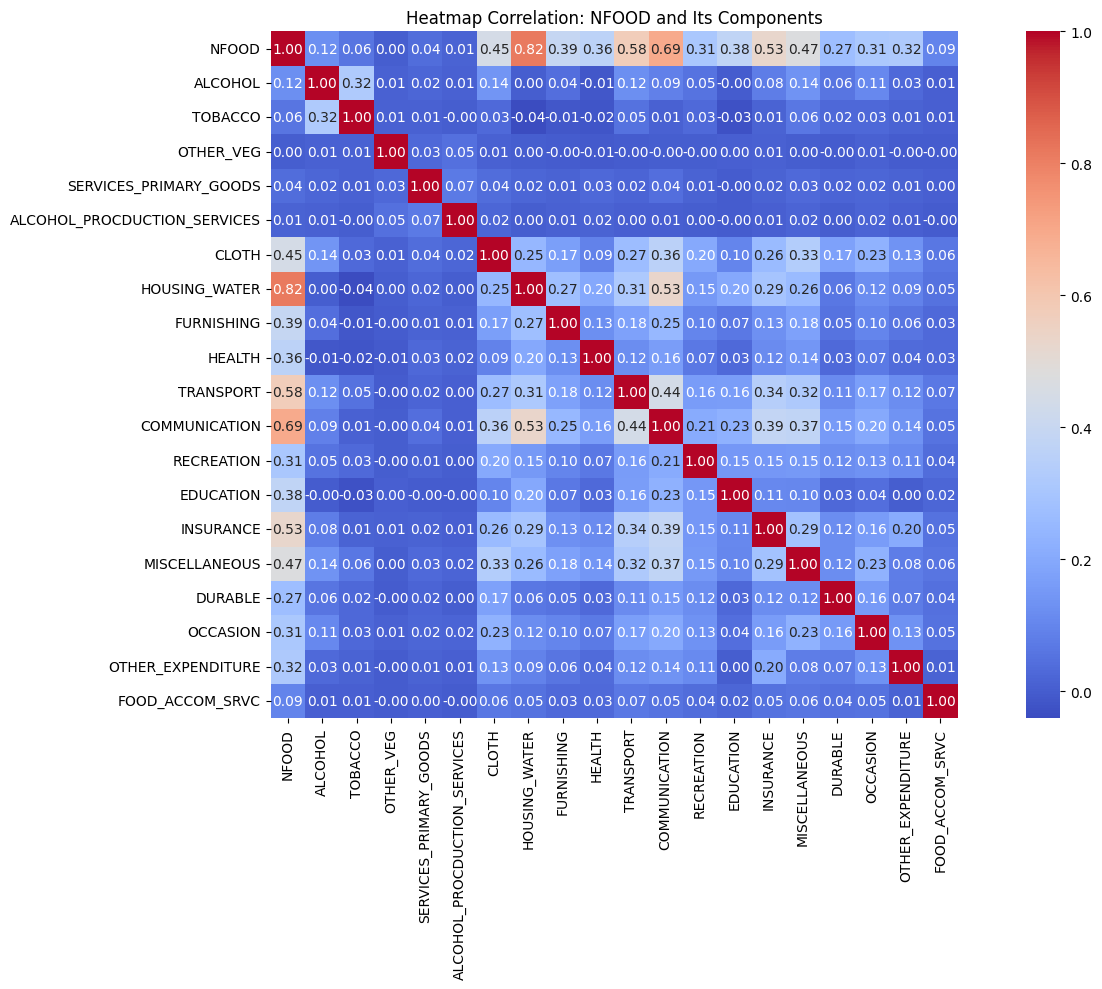

In [42]:
# Define the aggregated column and its components
aggregated_col = 'NFOOD'
components_list = ['ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'FOOD_ACCOM_SRVC']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- Based on the heatmap correlation of `NFOOD` and its components, the top contributors to non-food household expenses are `HOUSING_WATER` (0.82), `COMMUNICATION` (0.69), and `TRANSPORT` (0.58), highlighting the significant share of housing-related costs, connectivity, and mobility in NCR households' spending.
- Other notable components include `INSURANCE` (0.53), `MISCELLANEOUS` (0.47), `CLOTH` (0.45), `FURNISHING` (0.39), `EDUCATION` (0.38), and `HEALTH` (0.36), reflecting additional necessary expenditures related to financial security, personal needs, and social services.
- These correlations indicate that NCR households allocate most of their non-food spending to *essential living expenses*, while still maintaining moderate spending on education, health, and other personal and household-related needs.

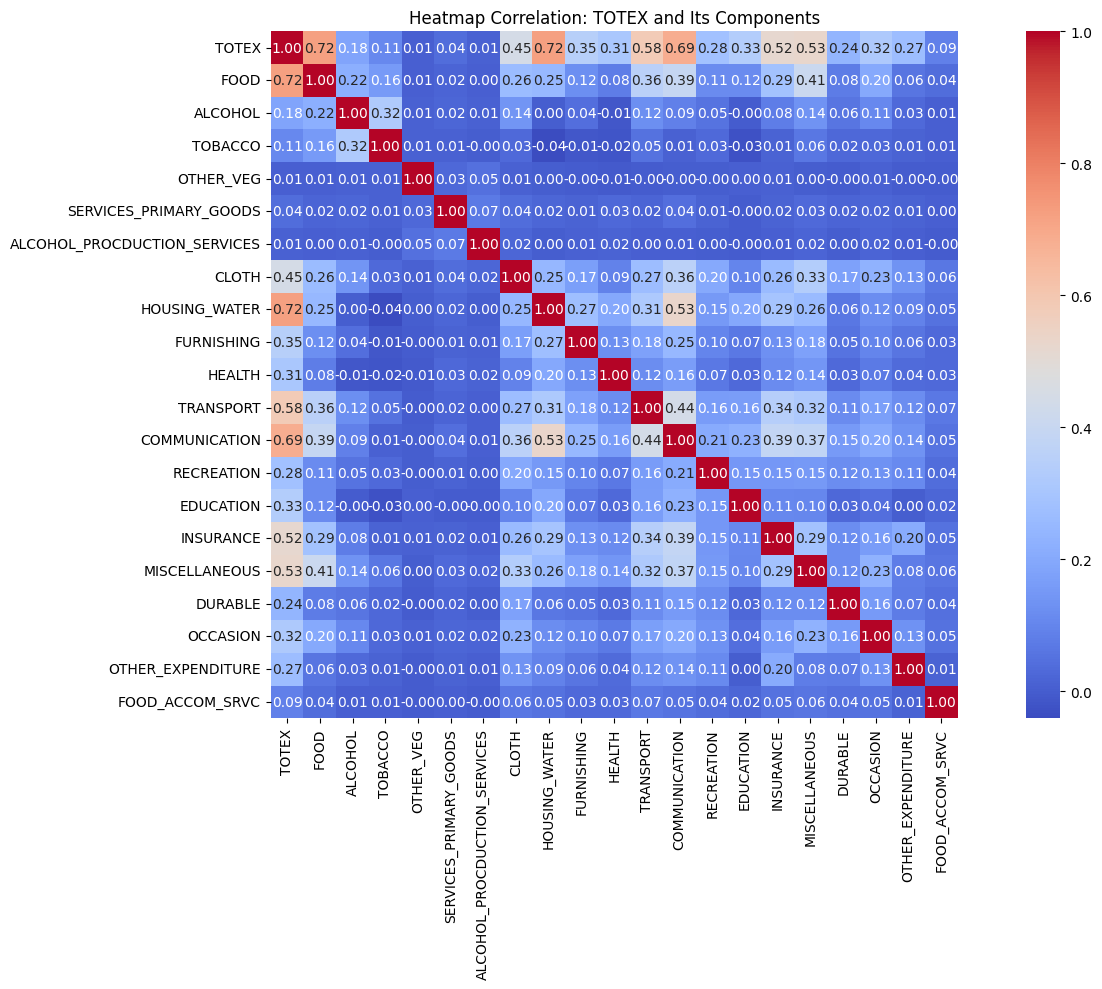

In [43]:
# Define the aggregated column and its components
aggregated_col = 'TOTEX'
components_list = ['FOOD', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 
                   'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 
                   'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 
                   'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 
                   'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 
                   'FOOD_ACCOM_SRVC']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- `TOTEX` is composed of too many components, many of which have relatively low correlation

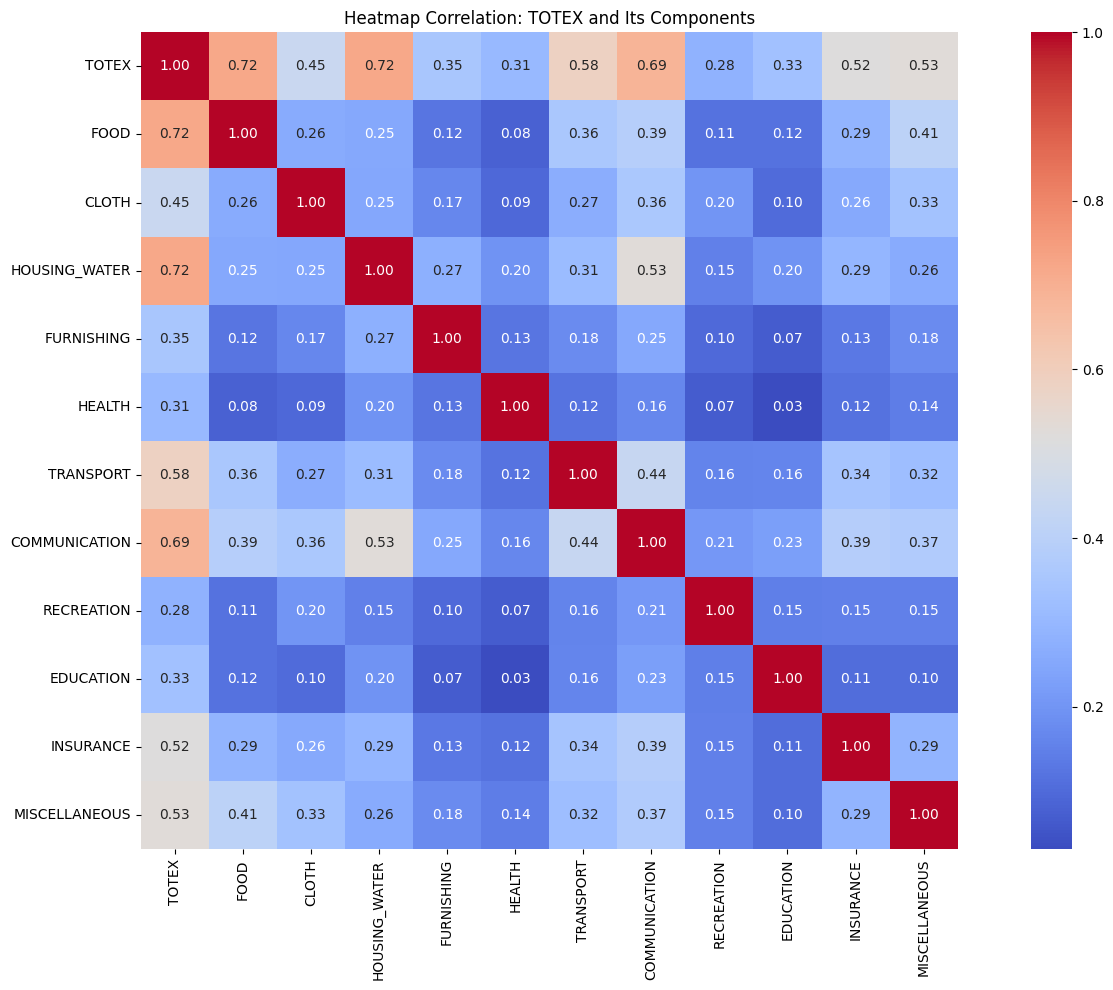

In [44]:
# Define the aggregated column and its components
aggregated_col = 'TOTEX'
components_list = ['FOOD', 'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 
                   'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 
                   'MISCELLANEOUS']
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(final_fies, aggregated_col, components_list, title=title)


- Based on the heatmap correlation of `TOTEX` and its components, `FOOD` and `HOUSING_WATER` emerge as the most significant contributors, both with a correlation of 0.72, underscoring the substantial share of basic needs—daily consumption and housing-related expenses—in total household expenditures.
    - `HOUSING_WATER` captures spending on *housing, water, electricity, gas, and other fuels*, reflecting the essential cost of maintaining a household, especially in highly urbanized areas like NCR where utility expenses are substantial.
- Other notable contributors include `COMMUNICATION` (0.69), `TRANSPORT` (0.58), `MISCELLANEOUS` (0.53), `INSURANCE` (0.52), and `CLOTH` (0.45), indicating that beyond food and housing, households also allocate significant portions of their expenses toward connectivity, mobility, financial security, and personal needs.

#### Distance Matrix

In [16]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [17]:
# Step 1: Select relevant columns for analysis
expenditure_columns = [
    'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 
    'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'FOOD_OUTSIDE',
    'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 
    'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 
    'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'FOOD_ACCOM_SRVC'
]

meta_columns = ['W_REGN', 'W_PROV', 'SEQ_NO', 'URB', 'SOCIAL_CLASS', 'TOINC']

# Step 2: Create the new DataFrame
fies_distance = final_fies[meta_columns + expenditure_columns].copy()
print(fies_distance.shape)
print(fies_distance.head())


(19492, 42)
   W_REGN  W_PROV  SEQ_NO  URB         SOCIAL_CLASS     TOINC    BREAD  \
0      13      39  105930    1           Low income  369476.0  27979.0   
1      13      39  105931    1  Lower-middle income  398060.0  39031.0   
2      13      39  105932    1                 Poor  174500.0  20289.0   
3      13      39  105933    1  Lower-middle income  472000.0  37285.0   
4      13      39  105934    1  Lower-middle income  820320.0  53135.0   

      MEAT     FISH    MILK     OIL   FRUIT      VEG   SUGAR  FOOD_NEC  \
0  30420.0  16640.0  2020.0  4620.0  3340.0   8710.0  1595.0    2490.0   
1  24925.0  18200.0  8900.0  1565.0  4640.0  10450.0   660.0    1685.0   
2  17320.0   8450.0  1630.0  1565.0  1430.0  22425.0  2085.0    2490.0   
3  37050.0  31200.0  5125.0  1500.0  5230.0   5800.0  1055.0    3420.0   
4  40040.0  50160.0  8610.0  2145.0  3510.0  17290.0  2857.0    2495.0   

   FRUIT_VEG   COFFEE  TEA  COCOA   WATER  SOFTDRINKS  OTHER_NON_ALCOHOL  \
0        0.0   5475.0 

In [18]:
# Step 3: Normalize expenditures by TOINC (Total Income) to get relative spending
fies_relative = fies_distance.copy()
for col in expenditure_columns:
    fies_relative[col] = fies_relative[col] / fies_relative['TOINC']

# Optional check
print(fies_relative[expenditure_columns].head())


      BREAD      MEAT      FISH      MILK       OIL     FRUIT       VEG  \
0  0.075726  0.082333  0.045037  0.005467  0.012504  0.009040  0.023574   
1  0.098053  0.062616  0.045722  0.022358  0.003932  0.011657  0.026252   
2  0.116269  0.099255  0.048424  0.009341  0.008968  0.008195  0.128510   
3  0.078994  0.078496  0.066102  0.010858  0.003178  0.011081  0.012288   
4  0.064774  0.048810  0.061147  0.010496  0.002615  0.004279  0.021077   

      SUGAR  FOOD_NEC  FRUIT_VEG    COFFEE  TEA  COCOA     WATER  SOFTDRINKS  \
0  0.004317  0.006739        0.0  0.014818  0.0    0.0  0.006685    0.000000   
1  0.001658  0.004233        0.0  0.008077  0.0    0.0  0.004246    0.000000   
2  0.011948  0.014269        0.0  0.031375  0.0    0.0  0.014155    0.000000   
3  0.002235  0.007246        0.0  0.023212  0.0    0.0  0.003305    0.000964   
4  0.003483  0.003041        0.0  0.013348  0.0    0.0  0.004120    0.000000   

   OTHER_NON_ALCOHOL  FOOD_OUTSIDE  ALCOHOL   TOBACCO  OTHER_VEG  \


#### Attempt 1

In [19]:
# Step 4: Compute pairwise Euclidean distances using pdist (condensed form)
distance_matrix = pdist(fies_relative[expenditure_columns], metric='euclidean')

In [20]:
# Step 5: Perform hierarchical clustering with the condensed distance matrix
linkage_matrix = linkage(distance_matrix, method='ward')

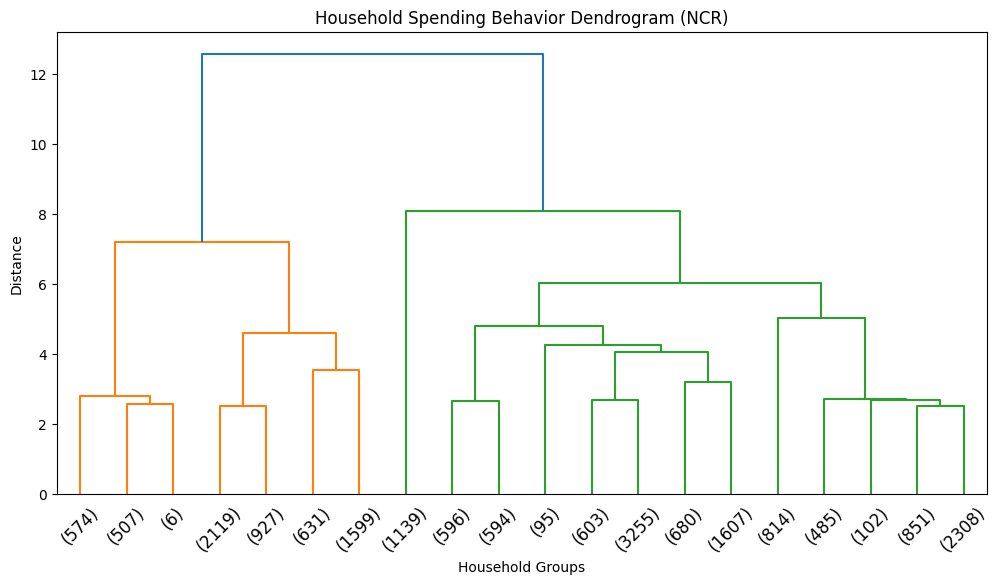

In [21]:
# Step 6: Plot the dendrogram (truncate to make it readable)
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix, 
    truncate_mode='lastp',  # Shows only last p merged clusters
    p=20,                   # Number of clusters to show
    leaf_rotation=45, 
    leaf_font_size=12
)
plt.title('Household Spending Behavior Dendrogram (NCR)')
plt.xlabel('Household Groups')
plt.ylabel('Distance')
plt.show()

In [22]:
from scipy.cluster.hierarchy import fcluster

# Example: cutting dendrogram to form 4 clusters (adjust number as needed based on dendrogram analysis)
cluster_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')
fies_relative['Cluster'] = cluster_labels


In [23]:
cluster_summary = fies_relative.groupby('Cluster')[expenditure_columns].mean().T


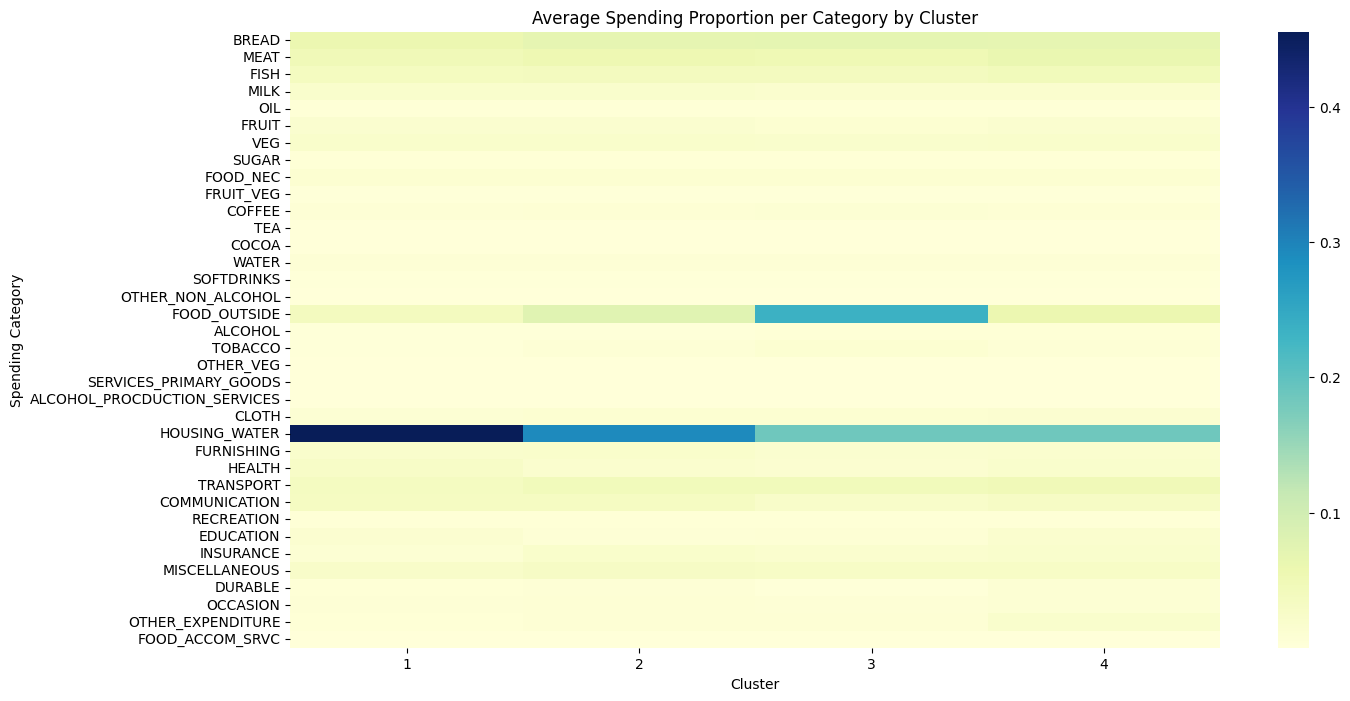

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.heatmap(cluster_summary, annot=False, cmap='YlGnBu')
plt.title('Average Spending Proportion per Category by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Category')
plt.show()


In [25]:
import pandas as pd

# Cross-tab to see how SOCIAL_CLASS is distributed in each cluster
income_class_distribution = pd.crosstab(fies_relative['Cluster'], fies_relative['SOCIAL_CLASS'])
# print(income_class_distribution)
income_class_distribution = income_class_distribution.div(income_class_distribution.sum(axis=1), axis=0)
print("Social Class Distribution:\n",income_class_distribution)




Social Class Distribution:
 SOCIAL_CLASS  Low income  Lower-middle income  Middle income      Poor
Cluster                                                               
1               0.471021             0.376265       0.023919  0.128795
2               0.555155             0.335481       0.018196  0.091168
3               0.489903             0.402985       0.017559  0.089552
4               0.507256             0.408007       0.026939  0.057798


In [26]:
# from sklearn.metrics import pairwise_distances

# # Compute the Euclidean distance matrix between households
# distance_matrix = pairwise_distances(fies_relative[expenditure_columns], metric='euclidean')

# # Check shape (should be num_households x num_households)
# print(distance_matrix.shape)


In [27]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# sns.heatmap(distance_matrix, cmap='viridis', square=True)
# plt.title('Euclidean Distance Heatmap of NCR Households (Relative Spending)')
# plt.xlabel('Households')
# plt.ylabel('Households')
# plt.show()


In [28]:
# sns.clustermap(distance_matrix, cmap='viridis', figsize=(12, 10))
# plt.title('Clustered Distance Heatmap of NCR Households')
# plt.show()


In [29]:
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt

# # Perform hierarchical clustering
# linkage_matrix = linkage(distance_matrix, method='ward')

# # Plot the dendrogram
# plt.figure(figsize=(12, 6))
# dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=12)
# plt.title('Household Spending Behavior Dendrogram (NCR)')
# plt.xlabel('Household Groups')
# plt.ylabel('Distance')
# plt.show()
